In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
import datetime
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Reading the dataset
df = pd.read_csv("day.csv")

## 1.Inspecting the dataframe

In [3]:
# Checking the dataframe
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the shape of the dataframe
df.shape

(730, 16)

In [5]:
# Checking the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking the summary for the numeric columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking the null values in the dataframe
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 2.Data cleaning and analysis

Mapping the season variables where:

*   1 - Spring
*   2- Summer
*   3- Fall 
*   4- Winter


  
  
  

In [8]:
# Mapping the season variables where 
df['season'] = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})


In [9]:
# Printing the unique values of the season 
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

Mapping the weathersit variable where:


##### Best   : 
Clear, Few clouds, Partly cloudy, Partly cloudy

##### Neutral: 
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

##### Bad    : 
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

##### Worse  : 
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [10]:
df['weathersit']=df['weathersit'].map({1:'Best', 2:'Neutral', 3:'Bad', 4:'Worse'})

In [11]:
# Printing the unique values of the weather variable
df['weathersit'].value_counts()

Best       463
Neutral    246
Bad         21
Name: weathersit, dtype: int64

Mapping the weekday variable where:


*   0: Sunday

*   1: Monday

*   2: Tuesday

*   3: Wednesday
*   4: Thursday


*   5: Friday


*   6: Saturday





In [12]:
# Mapping the weekday variable:

df['weekday'] =df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Monday,1,Neutral,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Tuesday,1,Neutral,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Wednesday,1,Best,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Thursday,1,Best,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Friday,1,Best,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,Saturday,0,Best,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,0,Sunday,0,Neutral,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,0,Monday,1,Neutral,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,0,Tuesday,1,Best,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,0,Wednesday,1,Best,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [13]:
# Printing the different values of the weekday
df.weekday.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)


Mapping the mnth variables where :

*   1: Jan

*   2: Feb

*   3: Mar

*   4: April

*   5: May

*   6: June
*   7: Jul


*   8: Aug


*   9: Sep


*   10: Oct


*   11: Nov


*   12: Dec



In [14]:
# Mapping the mnth variables:

df['mnth']= df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [15]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,Neutral,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,Neutral,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Best,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,Best,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Best,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
# Dropping the instant variable.
df.drop("instant", axis = 1, inplace = True)

In [17]:
# Dropping the dteday variable:
df.drop("dteday", axis = 1, inplace = True)

### Univariate analysis

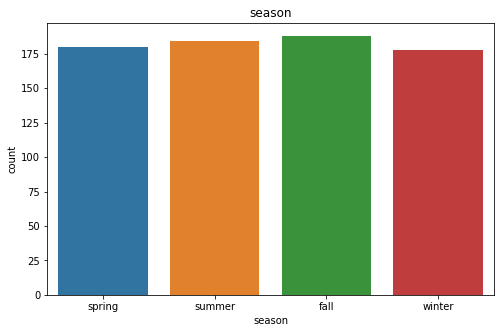

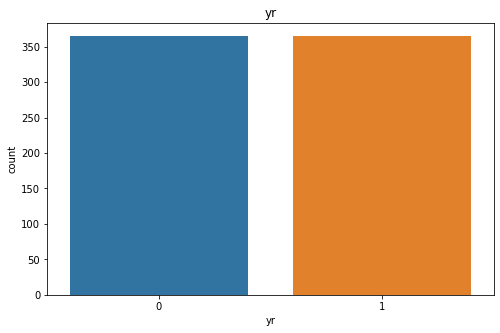

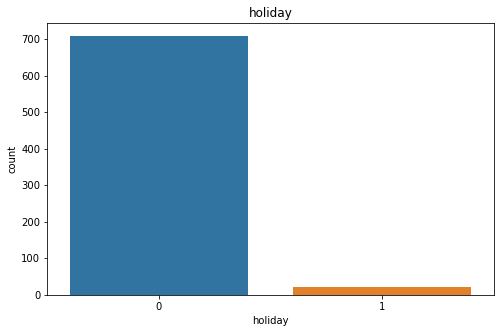

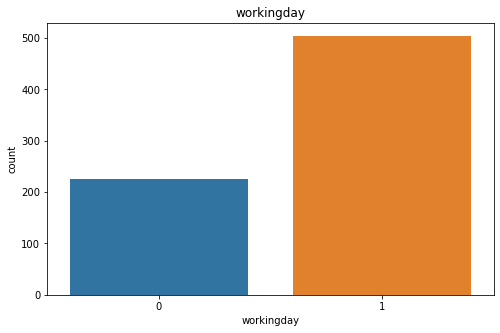

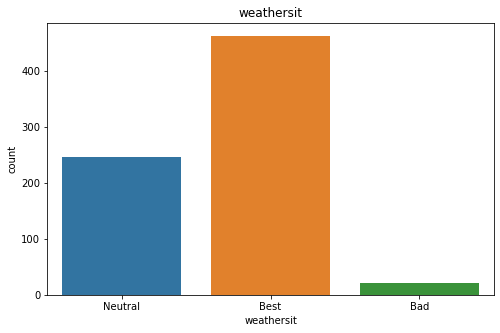

In [18]:
# Univariate analysis on the categorical variables:

univariate_cols = ['season','yr','holiday','workingday','weathersit']
for col in univariate_cols:
    plt.figure(figsize = [8,5])
    sns.countplot(x = col, data = df)
    plt.title(col)
    plt.show()
    

#### Inferences:
1. Even though the margin is minimum, the number of days in fall is maximum and winter is minimum. Number of days as per season in decreasing order: Fall, Summer, Spring, Winter.
2. The number of public holidays is 21 in 2 years. Number of holidays in 2018 and 2019 are 10 and 11 respectively  
3. The number of non-working days is slightly less than half the number of working days which can be favourable for bike renting for exploring different places during non working days but can be non-favourable as well since the daily commute to office during the working days can be hampered.
4. Weather situation is mostly best case scenario and neutral compared to bad and worse which is favourable for renting bikes.

In [19]:
#  Printing the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


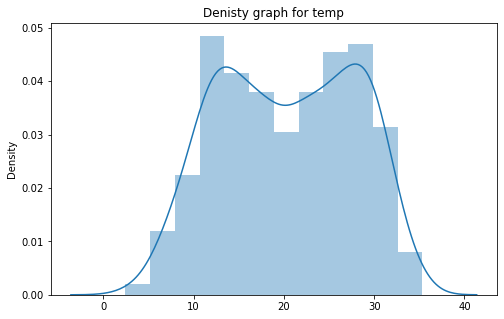

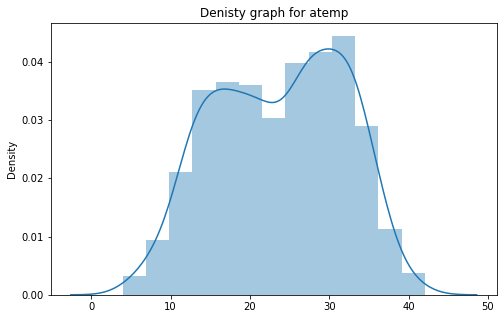

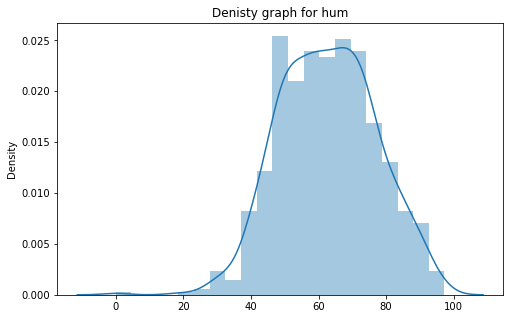

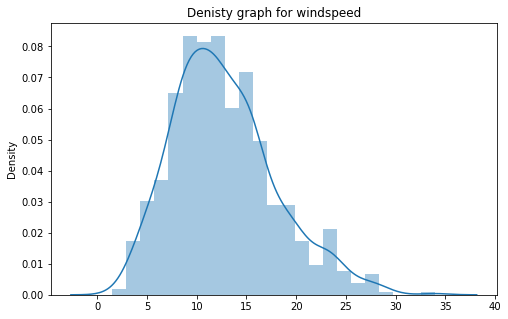

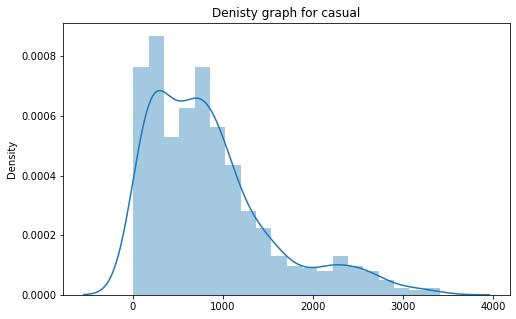

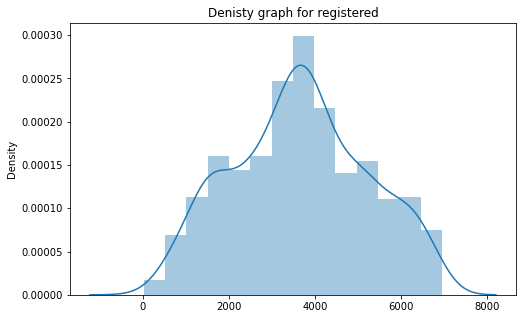

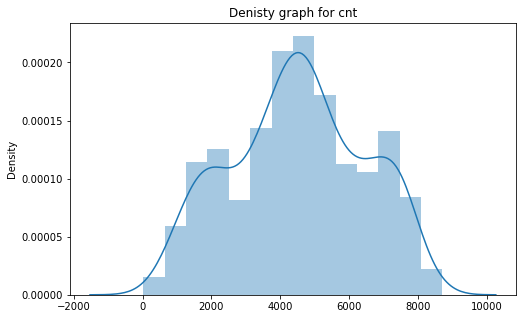

In [20]:
# Univariate analysis of the continuous variables:
uni_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']
for col in uni_cols:
    plt.figure(figsize = [8,5])
    sns.distplot(x = df[col])
    plt.title('Denisty graph for '+ col)
    plt.show()
    

#### Inferences:
1. Values of temperature and feeling temperature are differently distributed.
2. Humidity is almost randomly distributed with a mean of around 61-63.
3. The KDE of windspeed is almost a normal distribution with a right skew because of a few days with windspeed over 30.
4. The spread of casual users is not normally distributed where as that of registered users is normally distributed ultimately leading to cnt to be spread normally distributed.

## Bivariate analysis

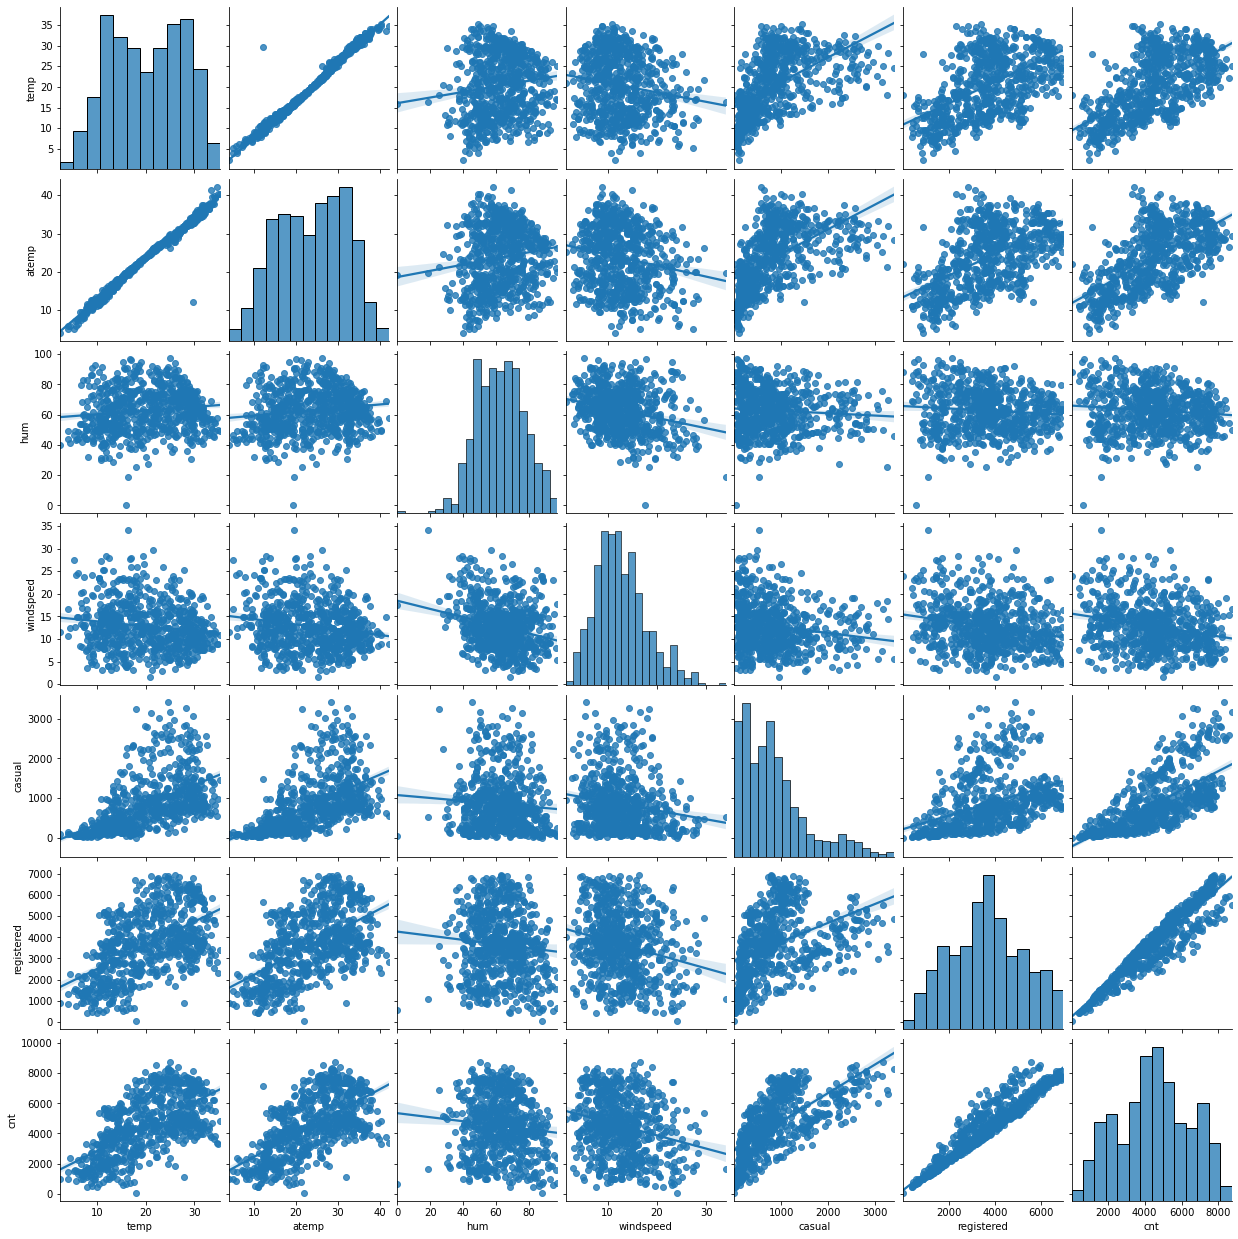

In [21]:
#  Bivariate analysis on the continuous variable with cnt
sns.pairplot(df, vars = uni_cols, kind ='reg')
plt.show()

#### Inference
1. Same corelation between temp and atemp. Hence only one of the 2 variables will be in the model.
2. temp/atemp shows some linear relationship with cnt.
3. hum and windspeed doesn't show much of a linear relationship with cnt.
4. Casual and registered shows linear relationship with cnt out of which the linear relationship shown by registered users is very significant.
5. Rest there are not any significant linear relationships.

In [22]:
#Bivariate analysis of categorical variables with cnt
def box_plot(x_axis,y_axis):
  plt.figure(figsize=(8,6))
  sns.boxplot(x =x_axis , y=y_axis  ,data = df)
  plt.title(f'{x_axis} vs {y_axis}',fontsize = 16)
  plt.show()


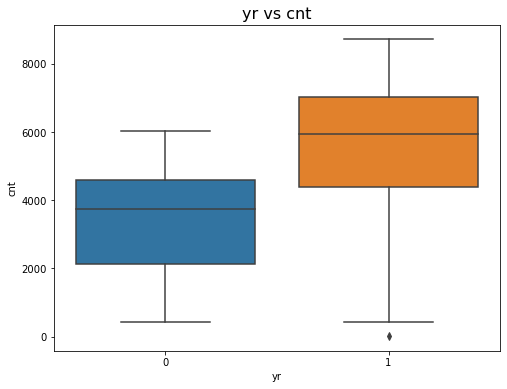

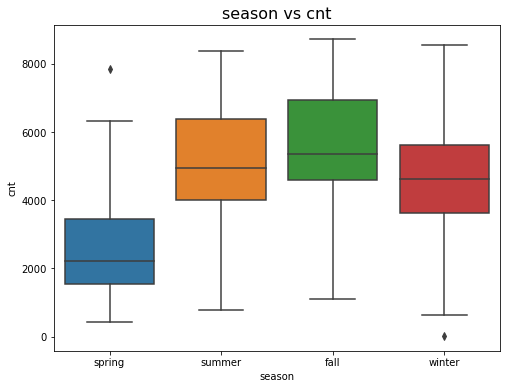

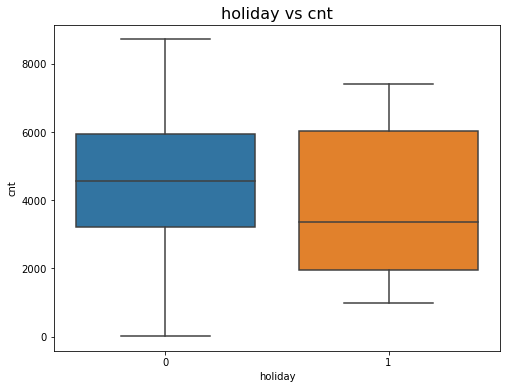

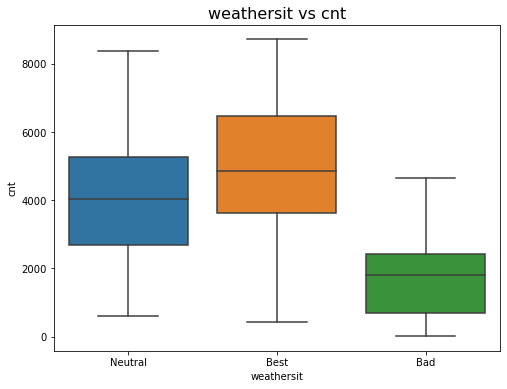

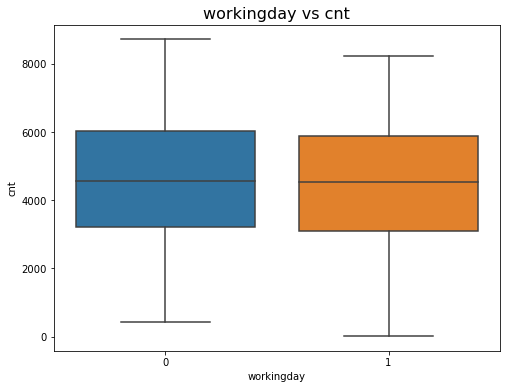

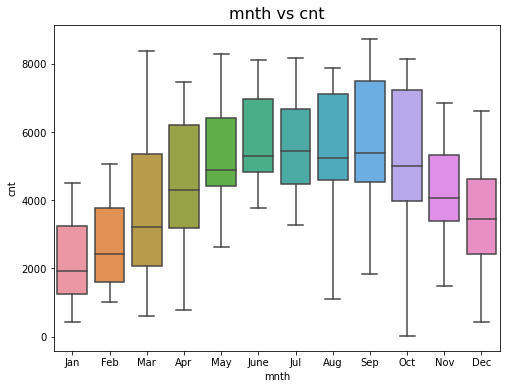

In [23]:
#Bivariate analysis of categorical variables with cnt

box_plot('yr','cnt')
box_plot('season','cnt')
box_plot('holiday','cnt')
box_plot('weathersit','cnt')
box_plot('workingday','cnt')
box_plot('mnth','cnt')



#### Inferences
1. The cnt in the year 2019 was way more than that in 2018. The 75th percentile of the cnt in 2018 is almost equivalent to 25 percentile in 2019.
2. Number of bikes booked according to seasons in a decreasing order: Fall, Summer, Winter and Spring.
3. The trend of increasing use of bike starts from january(lowest) till June then stays almost the same till september and then starts dropping. There's a scope to increase the bike usage in the months from january till May and from October to december. The drop of bike usage from october till December might be explained by the winter season and less bike usage from January to April might be explained by higher windspeed.
4. The average count of bikes rented is more during non-public holidays.
5. The average count of bikes rented when the weather is situation is 'Clear, Few clouds, Partly cloudy, Partly cloudy' or 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' termed as 'Best' and 'Neutral' is much more compared to other situations termed as 'Bad' and 'Worse'

In [24]:
# Checking the correlations
corre = df.corr()
corre

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.250502,0.054055,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.596911,-0.109142,0.005466,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


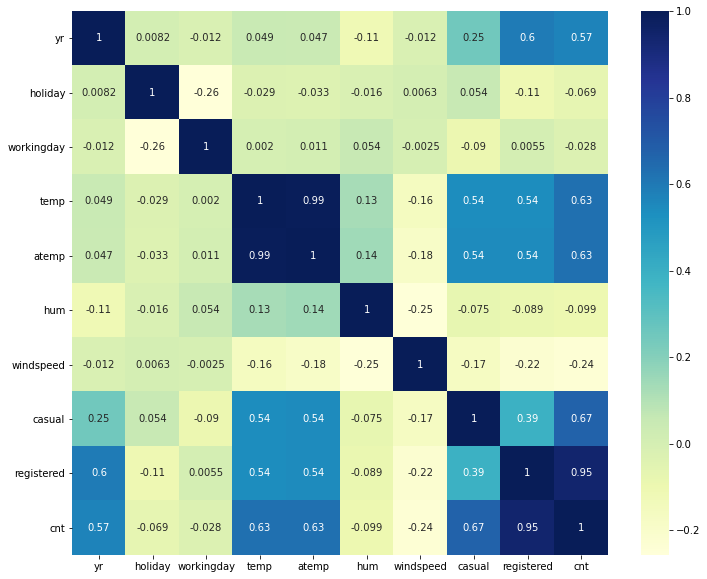

In [25]:
# Plotting the heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corre,annot = True, cmap  = 'YlGnBu' )
plt.show()

#### Since we have casual+registered=cnt and inferences are built from casual and registered records, let's drop them since these columns seem irrelevant for the model. Also it is a given that increasing casual or registered users both will be profitable factor for the business.

#### Also temp and atemp are very highly corelated and their respective colinearities with cnt are also same. Hence dropping atemp since feeling temperature can be relatively less accurate compared to temperature.

In [26]:
df.drop(['atemp','casual','registered'], axis = 1,inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Neutral,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Neutral,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Best,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Best,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Best,9.305237,43.6957,12.522300,1600


## 3.Preparing data for modelling

In [27]:
# Creating the dummy variables function

def dummies(dataframe, x):
    dum = pd.get_dummies(dataframe[x], drop_first = True)
    dataframe = pd.concat([dataframe,dum],axis = 1)
    dataframe.drop(x,axis = 1, inplace = True)
    return dataframe


In [28]:
# Applying the dummy function on variables.
df = dummies(df,'season')
df = dummies(df,'mnth')
df = dummies(df,'weekday')
df = dummies(df,'weathersit')
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Best,Neutral
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# Printing the shape of the new dataframe
df.shape

(730, 29)

### Splitting the dataset into test and train

In [30]:
df_train,df_test = train_test_split(df,train_size = 0.7, random_state = 11)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the train features:

In [31]:
#Rescaling the variables 

scaler = MinMaxScaler()
rescale =  ['temp','hum','cnt','windspeed']
df_train[rescale] = scaler.fit_transform(df_train[rescale])
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Best,Neutral
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.486275,0.027451,0.701961,0.520119,0.651639,0.375577,0.491457,0.256863,0.245098,0.247059,...,0.074510,0.086275,0.150980,0.135294,0.139216,0.152941,0.147059,0.141176,0.627451,0.350980
std,0.500302,0.163554,0.457846,0.241707,0.143508,0.201211,0.236505,0.437332,0.430568,0.431725,...,0.262857,0.281045,0.358381,0.342373,0.346511,0.360284,0.354512,0.348545,0.483958,0.477745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.305415,0.543082,0.231424,0.317630,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.531229,0.648671,0.355587,0.497643,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.731805,0.756962,0.491733,0.677082,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the  training dataset into X and Y 


In [32]:
x_train= df_train.drop('cnt',axis = 1)
y_train = df_train.pop('cnt')

## 4.Model building

In [33]:
# Since the total number of variables are a lot, using RFE to calculate the best 15 variables to be used for model building

lr = LinearRegression().fit(x_train,y_train)
rfe = RFE(lr,15)
rfe = rfe.fit(x_train,y_train)
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('Aug', False, 13),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('June', False, 9),
 ('Mar', False, 12),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 6),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 14),
 ('Tuesday', False, 5),
 ('Wednesday', False, 11),
 ('Best', True, 1),
 ('Neutral', True, 1)]

In [34]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Dec',
       'Feb', 'Jan', 'Jul', 'Nov', 'Sep', 'Best', 'Neutral'],
      dtype='object')

In [35]:
x_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Aug', 'June', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [36]:

x_train_rfe = x_train[col]
x_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,winter,Dec,Feb,Jan,Jul,Nov,Sep,Best,Neutral
562,1,0,0.943365,0.520137,0.183152,0,0,0,0,0,1,0,0,1,0
523,1,0,0.722275,0.481149,0.344890,0,0,0,0,0,0,0,0,1,0
524,1,0,0.802869,0.449443,0.262379,0,0,0,0,0,0,0,0,1,0
268,0,0,0.722275,0.872322,0.173258,0,1,0,0,0,0,0,1,0,1
499,1,0,0.673265,0.817052,0.270617,0,0,0,0,0,0,0,0,0,1


In [37]:
# Defining a function to calculate the VIF:

    
def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### First model

In [38]:
# Training the model
x_train_lm = sm.add_constant(x_train_rfe)
lr_1 = sm.OLS(y_train,x_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.29e-194
Time:                        04:39:53   Log-Likelihood:                 500.70
No. Observations:                 510   AIC:                            -969.4
Df Residuals:                     494   BIC:                            -901.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1530      0.048      3.207      0.0

In [39]:
# Calculating the VIF
VIF(x_train_rfe)

,Features,VIF
3,hum,23.90
2,temp,20.14
13,Best,15.68
14,Neutral,10.65
5,spring,4.70
4,windspeed,4.30
6,winter,2.99
9,Jan,2.55
8,Feb,2.32
11,Nov,2.05


### Second Model

In [40]:
# Dropping the hum varible as the VIF is much higher
x_train_rfe.drop('hum',axis = 1, inplace = True)


In [41]:
# Traing the model
x_train_lm = sm.add_constant(x_train_rfe)
lr_2 = sm.OLS(y_train,x_train_lm).fit()
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.96e-192
Time:                        04:39:53   Log-Likelihood:                 492.17
No. Observations:                 510   AIC:                            -954.3
Df Residuals:                     495   BIC:                            -890.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0279      0.037      0.750      0.4

In [42]:
# Calculating the VIF
VIF(x_train_rfe)

,Features,VIF
2,temp,14.52
12,Best,14.15
13,Neutral,7.93
4,spring,4.48
3,windspeed,4.30
5,winter,2.80
8,Jan,2.50
7,Feb,2.30
10,Nov,2.02
0,yr,2.00


### Third model

In [43]:
# Dropping the Best variabl as its VIF is very high and has low correlation
x_train_rfe.drop('Best',axis = 1, inplace = True)


In [44]:
# Traing the model
x_train_lm = sm.add_constant(x_train_rfe)
lr_3 = sm.OLS(y_train,x_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.90e-176
Time:                        04:39:53   Log-Likelihood:                 451.34
No. Observations:                 510   AIC:                            -874.7
Df Residuals:                     496   BIC:                            -815.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2831      0.027     10.420      0.0

In [45]:

# Calculating VIF
VIF(x_train_rfe)

,Features,VIF
2,temp,4.72
4,spring,4.06
3,windspeed,3.99
5,winter,2.64
8,Jan,2.27
7,Feb,2.19
0,yr,1.98
10,Nov,1.90
6,Dec,1.62
12,Neutral,1.56


### Fourth model


In [46]:
# Dropping the Sep varible as it is insignificant
x_train_rfe.drop('Sep',axis = 1, inplace = True)


In [47]:
# Traing the model
x_train_lm = sm.add_constant(x_train_rfe)
lr_4 = sm.OLS(y_train,x_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     189.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.69e-176
Time:                        04:39:53   Log-Likelihood:                 449.90
No. Observations:                 510   AIC:                            -873.8
Df Residuals:                     497   BIC:                            -818.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.027     10.441      0.0

In [48]:

# Calculating the VIF
VIF(x_train_rfe)

,Features,VIF
2,temp,4.39
4,spring,4.05
3,windspeed,3.95
5,winter,2.60
8,Jan,2.27
7,Feb,2.19
0,yr,1.98
10,Nov,1.86
6,Dec,1.61
11,Neutral,1.55


### Fifth model

In [49]:
# Dropping the variable spring as it has a VIF and is negatively correlated
x_train_rfe.drop('spring',axis = 1, inplace = True)


In [50]:
# Training the model
x_train_lm = sm.add_constant(x_train_rfe)
lr_5 = sm.OLS(y_train,x_train_lm).fit()
print(lr_5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     193.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          4.76e-172
Time:                        04:39:53   Log-Likelihood:                 436.61
No. Observations:                 510   AIC:                            -849.2
Df Residuals:                     498   BIC:                            -798.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2246      0.025      8.889      0.0

In [51]:

# Calculating the VIF
VIF(x_train_rfe)

,Features,VIF
2,temp,4.37
3,windspeed,3.70
4,winter,2.38
0,yr,1.97
9,Nov,1.84
10,Neutral,1.54
5,Dec,1.40
8,Jul,1.37
7,Jan,1.29
6,Feb,1.22


### Sixth model

In [52]:
# Dropping the windspeed  variable as has very low correlation and high VIF
x_train_rfe.drop('windspeed',axis = 1, inplace = True)


In [53]:
# Training the model
x_train_lm = sm.add_constant(x_train_rfe)
lr_6 = sm.OLS(y_train,x_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.72e-167
Time:                        04:39:53   Log-Likelihood:                 421.39
No. Observations:                 510   AIC:                            -820.8
Df Residuals:                     499   BIC:                            -774.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1567      0.023      6.893      0.0

In [54]:

# Calculating the VIF
VIF(x_train_rfe)

,Features,VIF
2,temp,2.63
3,winter,2.38
0,yr,1.97
8,Nov,1.78
9,Neutral,1.53
4,Dec,1.36
7,Jul,1.33
6,Jan,1.12
5,Feb,1.07
1,holiday,1.06


### The above lr_6 model seems to be our best model so far and can be used for further predictions.

## 5.Residual Analysis

In [55]:
# Predicting the Y values for the train set:
y_train_pred = lr_6.predict(x_train_lm)

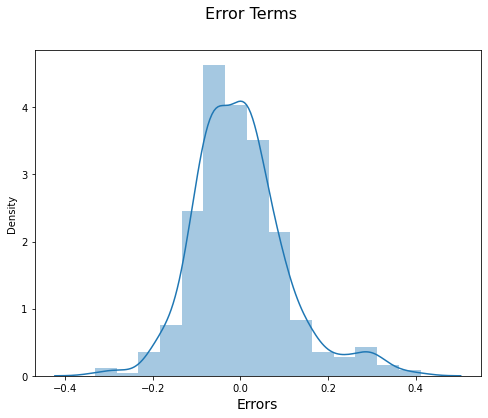

In [56]:
# Plotting the error terms 
fig = plt.figure(figsize=(8,6))
sns.distplot(y_train_pred-y_train,bins = 15)
fig.suptitle('Error Terms', fontsize = 16)                  
plt.xlabel('Errors', fontsize = 14) 
plt.show()

 #### Residual Analysis shows that error terms gives almost a normal distribution and having a mean at 0


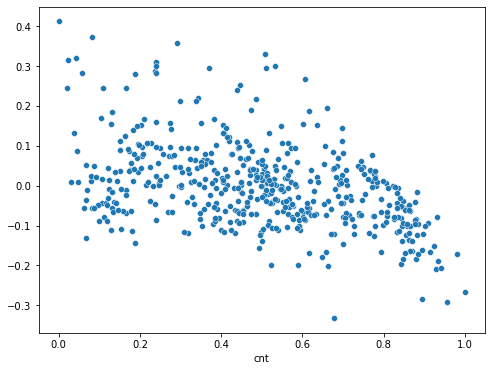

In [57]:
# Checking Homoscedasticity
plt.figure(figsize=(8,6))
sns.scatterplot(y_train,(y_train_pred-y_train))
plt.show()

#### There is no clustering or pattern below or above 0.0 on the Y-axis. This model is giving best results compared to other models formed earlier while training.

In [58]:
# Checking the r2 score of our final model on the train set

r2_score(y_train,y_train_pred)

0.7990819601012258

## 6. Making a prediction.

In [59]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Best,Neutral
667,1,0,1,13.045462,82.5455,14.271603,1096,0,0,1,...,1,0,0,0,0,0,0,1,0,1
541,1,0,1,25.864153,37.3333,23.292014,7442,0,0,0,...,0,0,0,0,0,0,0,1,1,0
429,1,0,1,10.591653,45.6667,13.458625,3956,1,0,0,...,0,0,0,0,0,0,0,1,1,0
150,0,0,1,31.775000,63.6667,7.459043,3982,0,1,0,...,0,0,0,0,0,1,0,0,1,0
296,0,0,1,18.996653,77.2083,7.959064,4187,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [60]:
# Rescaling columns from the list rescale=['temp','hum','windspeed','cnt']
rescale =  ['temp','hum','cnt','windspeed']
df_test[rescale] = scaler.transform(df_test[rescale])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Best,Neutral
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.531818,0.031818,0.663636,0.524904,0.630938,0.406865,0.491932,0.222727,0.268182,0.236364,...,0.109091,0.072727,0.127273,0.159091,0.150000,0.118182,0.136364,0.145455,0.650000,0.304545
std,0.500125,0.175916,0.473542,0.234098,0.152252,0.214858,0.228673,0.417026,0.444023,0.425817,...,0.312464,0.260281,0.334038,0.366595,0.357886,0.323559,0.343957,0.353363,0.478057,0.461264
min,0.000000,0.000000,0.000000,-0.048868,0.193231,-0.061062,-0.050647,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.335259,0.512598,0.251230,0.349359,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.508808,0.639031,0.366317,0.492445,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.728264,0.730184,0.523101,0.642179,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.982573,0.997858,1.226040,0.961441,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the data in x_test and y_test 

In [61]:
y_test = df_test.pop('cnt')
x_test = df_test[x_train_rfe.columns]
x_test.head()

,yr,holiday,temp,winter,Dec,Feb,Jan,Jul,Nov,Neutral
667,1,0,0.289697,1,0,0,0,0,0,1
541,1,0,0.698314,0,0,0,0,0,0,0
429,1,0,0.211478,0,0,0,0,0,0,0
150,0,0,0.886731,0,0,0,0,0,0,0
296,0,0,0.479401,1,0,0,0,0,0,0


In [62]:
# Adding a constant to the dataframe
x_test = sm.add_constant(x_test)

In [63]:
# Preidcting the values on the test set
y_test_pred = lr_6.predict(x_test)

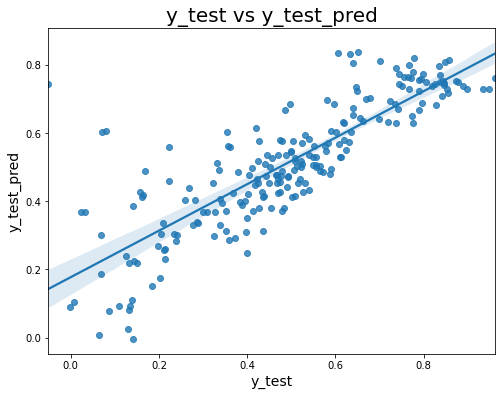

In [64]:
# Understanding the spred of the predicted values
plt.figure(figsize  =(8,6))
sns.regplot(y_test,y_test_pred)
plt.xlabel('y_test', fontsize=14)                         
plt.ylabel('y_test_pred', fontsize=14) 
plt.title('y_test vs y_test_pred', fontsize=20)
plt.show()


In [65]:
# Checking the r2 score on the test dataset
r2_score(y_train_pred,y_train)

0.7485639146786369

In [66]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.72e-167
Time:                        04:39:54   Log-Likelihood:                 421.39
No. Observations:                 510   AIC:                            -820.8
Df Residuals:                     499   BIC:                            -774.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1567      0.023      6.893      0.0

#### Based on the very close value of R squared of the train and test data sets and based on y_test and y_test_pred graph, it can be infereed that the our linear regression model has the below equation for it's best fitted line:
#### <font color='brown'> cnt= 0.1567  + 0.2602 yr -0.0766 holiday + 0.4738 temp + 0.1151 winter -0.0961 Dec - 0.1191 Feb  - 0.1269 Jan - 0.0601 Jul -0.0845 Nov - 0.0650 Neutral</font>

## Hypothesis Testing
#### Null hypothesis states that there is no relationship between the X variables and the Y variables meaning the coefficients of the independent variables is zero. From the final model summary, it is evident that all our coefficients are not equal to zero which means <font color='brown'> We REJECT the NULL HYPOTHESIS</font>

#### The company should focus on the following factors:
1. People are less likely to use their service at low or extreme temperatures. So either the company can function to half the capacity or minimum capacity to reduce operational costs for better profits and provide service for regular registered customers mostly. Similarly in days with increase in humidity and windspeed. Discounts or offers won't help as well since it's inconvenient to commute using bikes in such situations.
2. There will be increase in the number of users with increase in year since people will start adapting to renting bikes more often. There might be chances that because of covid just been around the corner, the trend might not follow immediately but giving a year more will definitely see rise in number of users.
